**Project No.**: 00

**Project Name**: Hello World Agent

## Hello World Agent

In [4]:
!pip install -q langgraph typing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.4 MB/s eta 0:00:00


In [5]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [6]:
class AgentState(TypedDict):
  message: str

def greeting_node(state: AgentState):
  """This node modifies the initial state and return a greeting state."""

  state['message'] = "Hello " + state['message'] + ", how is it going with you?"
  return state

  # Alternatively, the state might be returned as below
  # return {"message": "Hello " + state['message'] + ", how is it going with you?"}

In [10]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)

graph.set_entry_point("greeting")
graph.set_finish_point("greeting")


app = graph.compile()

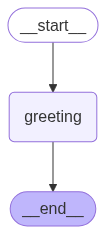

In [11]:
app

In [12]:
result = app.invoke({"message": "John"})

In [13]:
result

{'message': 'Hello John, how is it going with you?'}

Tools will be explained later, however, always keep in mind that...

Tool invocation flow in LangGraph is typically as listed below:

1. User input enters the graph.
2. A router or decision node may determine that a tool is needed.
3. The correct node calls the tool.
4. The result is passed into the next state.
5. The LLM (or another node) uses the result in its generation or decision-making